# EDA to examine cleaned data

In [15]:
# import libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import os
from scipy import stats
import math



In [2]:
# make sure to navigate to project folder
os.chdir('/Users/trevor.mattos/Desktop/nycdsa/finalproject/haystacks.ai_unsupervised_ml')
# import functions from scripts
from so_fresh_so_clean import *
from factor_analysis_mixed_data import *


In [3]:
# navigate to data folder
os.chdir('/Users/trevor.mattos/Desktop/nycdsa/finalproject/data')

In [4]:
# read data
df=pd.read_csv('GA_LISTINGS_SALES.csv')

In [5]:
# use cleaner function
df=df_cleaner(df)

In [30]:
# examine clean dataframe
df.head()

,latitude,longitude,city,county_name,beds,baths_full,square_footage,lot_size,year_built,details,special_features,price,transaction_type,listing_status,listing_special_features,census_state_name,census_county_name,zip,geometry
0,31.104492,-81.604486,Waverly,Camden-County,3.0,2.000000,1835.0,1.000000,2022.0,Detached,2,369900.0,1,1,2,Georgia,"Camden, GA",31565,POINT (-81.60449 31.10449)
1,31.237062,-82.337219,Waycross,Ware-County,3.0,2.000000,1722.0,0.000000,1957.0,Detached,0,190000.0,1,1,0,Georgia,"Ware, GA",31501,POINT (-82.33722 31.23706)
2,31.243601,-82.365578,Waycross,Ware-County,3.0,2.000000,1619.0,28.831352,1963.0,Detached,0,225000.0,1,1,0,Georgia,"Ware, GA",31501,POINT (-82.36558 31.24360)
3,31.222715,-82.352051,Waycross,Ware-County,4.0,2.581806,2050.0,28.831352,1952.0,Detached,0,99000.0,1,1,0,Georgia,"Ware, GA",31501,POINT (-82.35205 31.22272)
4,31.217091,-82.319481,Waycross,Ware-County,4.0,3.000000,3126.0,28.831352,1988.0,Detached,512,450000.0,1,1,512,Georgia,"Ware, GA",31501,POINT (-82.31948 31.21709)


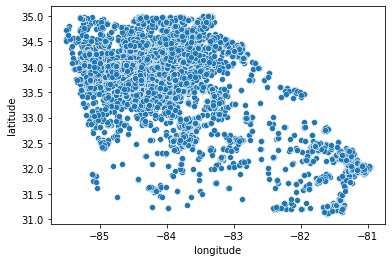

In [14]:
# without mapping using geopandas we can still see a rough map 
# of georgia with density near ATL
sns.scatterplot(data=df, x='longitude',y='latitude')

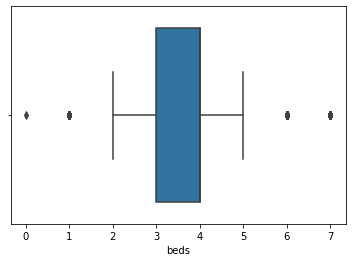

In [18]:
# bedrooms per property
sns.boxplot(data=df,x='beds')

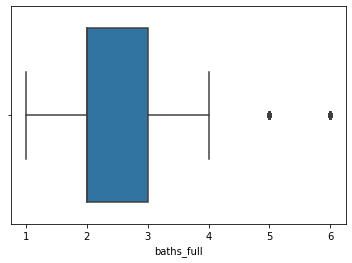

In [19]:
# bathrooms per property
sns.boxplot(data=df,x='baths_full')

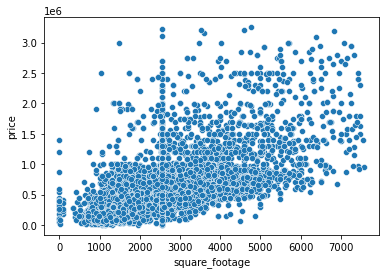

In [20]:
# square footage and price
sns.scatterplot(data=df, x='square_footage', y='price')

### Should we drop properties at the bottom left corner of price and sqft? 

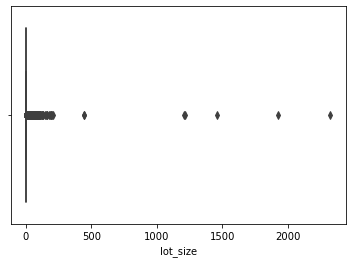

In [21]:
# lot size per property
sns.boxplot(data=df,x='lot_size')

### Should we also drop lot_size==0? Or maybe even lot_size<100? 

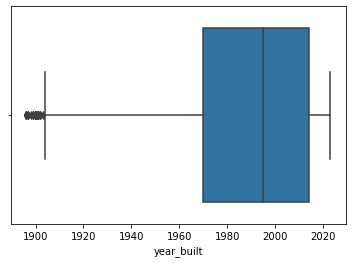

In [24]:
# year built per property
sns.boxplot(data=df,x='year_built')

In [29]:
# transaction type, listing status, listing special features
df.transaction_type.value_counts()
df.listing_status.value_counts()
df.listing_special_features.value_counts()


0      8740
2      2277
1       367
512      83
3        48
514      15
64        2
20        1
Name: listing_special_features, dtype: int64

### We don't know anything about the 3 features above, consult data dict soon.